# **دي داتاست عن تجار الجملة **
وكل عمود بيمثل المبالغ اللي صرفها العميل على كل فئة منتج

عشان نكتشف مجموعات العملاء المختلفة بناءً على سلوكهم الشرائي.
 يعني هنقسمهم لمجموعات زي "المطاعم" أو "المحلات الصغيرة" أو "الفنادق"، من غير ما يكون عندنا أي تصنيف جاهز ليهم

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Exploration**

In [90]:
data = pd.read_csv('/content/Wholesale customers data.csv' ,usecols=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])

In [91]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [92]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [94]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [95]:
data.duplicated().sum()

np.int64(0)

# **Preprocessing**

**انا قولت هاصنف علي حسب الرجل اللي بياخد ده محل كبير ولا صغير ولا كده ف حوار المنطفه بتاعته مش فارقالي يعني انا عايزة اعرف مثلا الشخص ده او العميل ده دكان ولا مول ولا ايه عشان كده انا هامسح الللي مش مفيد في الحوار ده **

In [96]:
data = data.drop(columns=["Channel" ,"Region"])

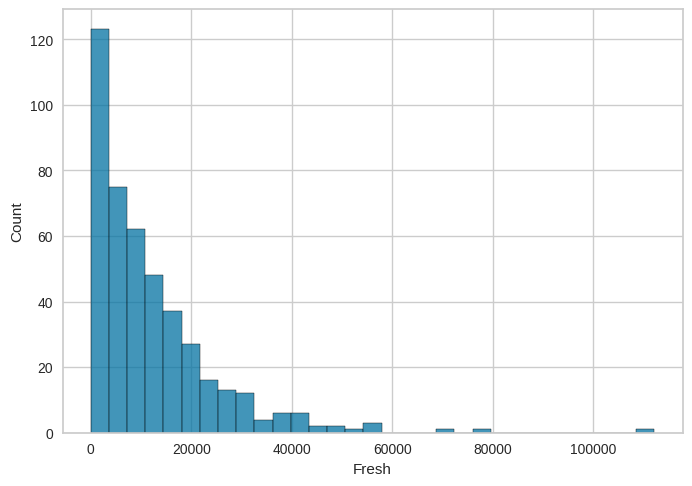

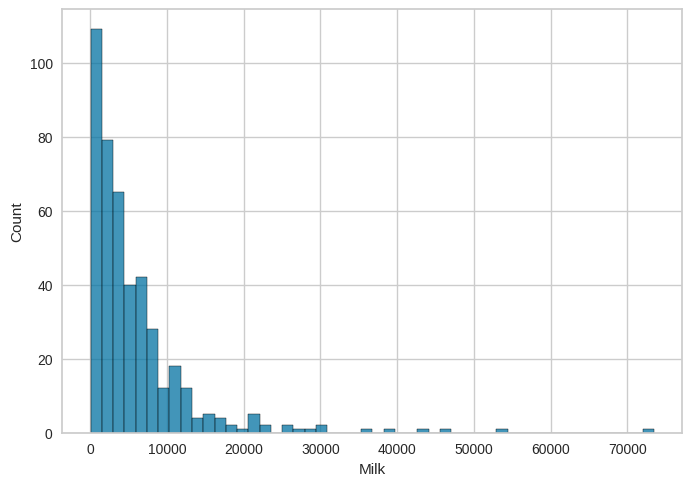

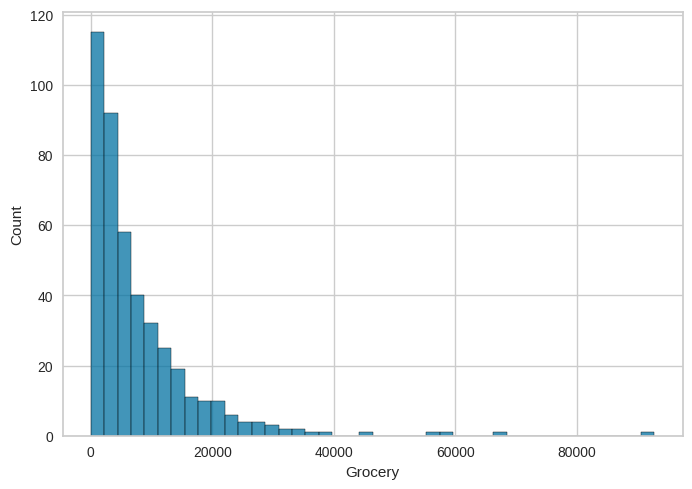

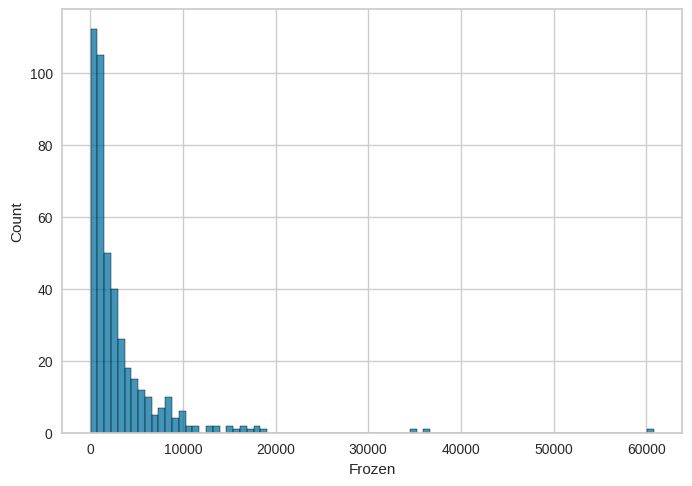

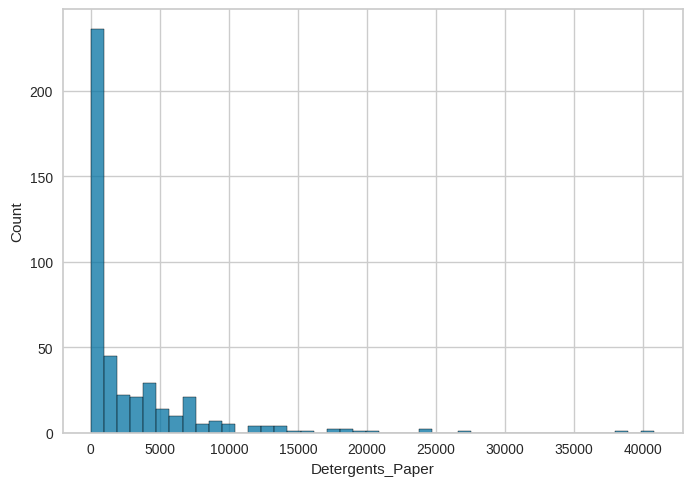

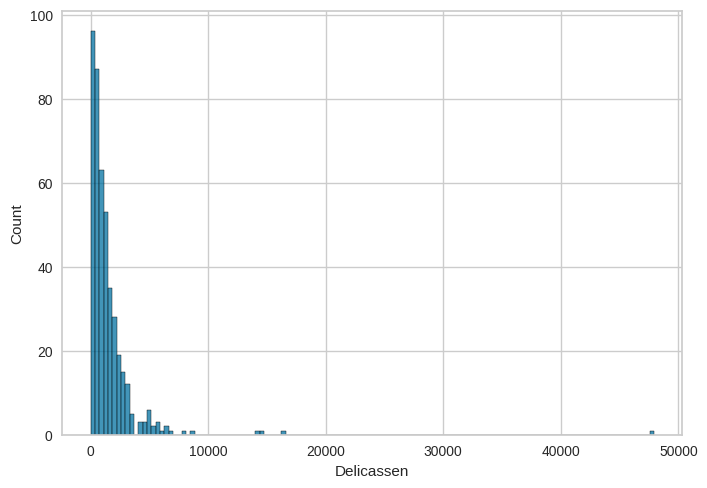

In [97]:
for col in data:
  sns.histplot(data[col])
  plt.show()

In [98]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [99]:
features = np.log(data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features )

In [100]:
features_scaled

array([[ 0.48456094,  0.97606958,  0.43913249, -1.50841768,  0.6430006 ,
         0.40768457],
       [ 0.08876643,  0.99071847,  0.65029061,  0.13468306,  0.76412675,
         0.62396715],
       [ 0.01768032,  0.89097001,  0.45360621,  0.37714691,  0.80224343,
         1.75841957],
       ...,
       [ 0.57731479,  1.41350165,  1.68252476, -0.95197733,  1.63994942,
         0.66213078],
       [ 0.343877  , -0.49039206, -0.65522803, -0.27772612, -0.96681026,
         0.76098885],
       [-0.53965722, -0.63310622, -0.54994107, -2.43711211, -0.35976309,
        -2.07271367]])

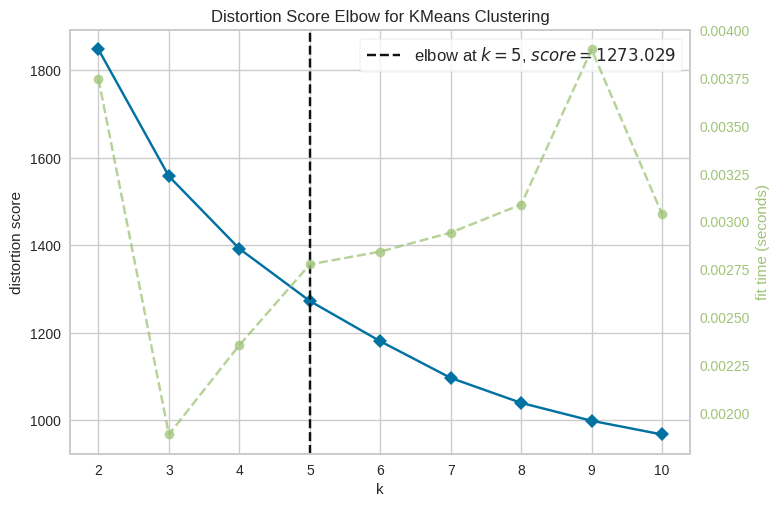

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(KMeans() ,K = 15)
elbow.fit(features_scaled )
elbow.show()


In [115]:
model =KMeans(
    n_clusters= 5,
    init ="k-means++",
    random_state=100,



)


y_kmeans = model.fit_predict(features_scaled )
centroids = model.cluster_centers_

In [116]:
from sklearn.metrics import silhouette_score
score = silhouette_score(features_scaled  , y_kmeans)
print(f'The Silhouette Score is: {score}')

The Silhouette Score is: 0.20141322210547777


In [122]:
# First, inverse transform the scaled centroids to get them back to log scale
# The result will be a numpy array
centroids_unscaled_log = scaler.inverse_transform(centroids)

# Convert the array to a DataFrame to have clear column names
centroids_df = pd.DataFrame(centroids_unscaled_log, columns=pd.DataFrame(data).columns)

# Second, inverse the log transformation using np.exp()
# This gives us the final centroids in their original, human-readable values
centroids_final = np.exp(centroids_df)

# Print the final centroids
centroids_final_dataframe =pd.DataFrame(centroids_final)
centroids_final_dataframe


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,14109.390806,2428.636912,2983.556418,4205.786462,387.122516,1177.966244
1,621.828848,7123.387177,13912.538896,274.915849,5794.513554,426.376120
2,9041.857563,9912.339982,13731.011233,1727.904731,4665.233146,2016.789834
3,4881.723880,658.613061,1039.335665,1547.322294,116.531353,281.414818
4,5078.925132,3061.783841,3730.833954,690.335615,598.764076,414.500637


In [119]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


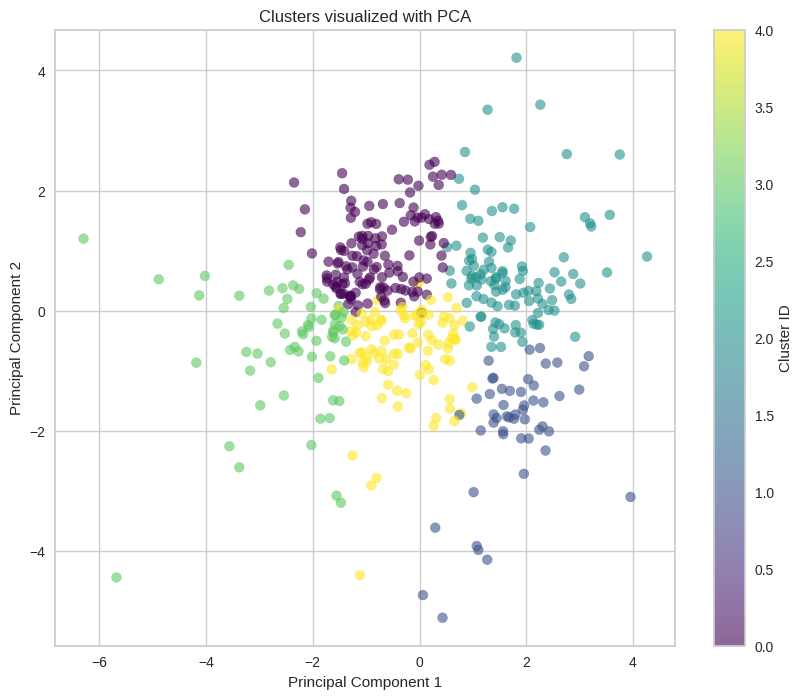

In [118]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# Create a DataFrame for the 2D data and add the cluster labels
df_2d = pd.DataFrame(features_2d, columns=['PC1', 'PC2'])
df_2d['Cluster'] = y_kmeans

# Plot the 2D data colored by their assigned clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_2d['PC1'], df_2d['PC2'], c=df_2d['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

In [123]:
# Now, add a detailed description for each cluster based on our analysis
print("Cluster 0: High-Spending Restaurants & Hotels")
print("- Characterized by very high spending on 'Fresh' and 'Frozen' products.")
print("- These are likely businesses that require a large quantity of fresh goods, such as high-end restaurants or hotels.")
print("-" * 50)

print("Cluster 1: Small Grocery Stores")
print("- High spending on 'Grocery', 'Milk', and 'Detergents_Paper'.")
print("- This group represents customers that purchase a wide range of essential goods in large quantities, fitting the profile of small grocery shops.")
print("-" * 50)

print("Cluster 2: Large Supermarkets / Major Retailers")
print("- This group shows very high spending across almost all product categories.")
print("- They are likely large supermarkets or major retail chains that need to stock a diverse and large inventory.")
print("-" * 50)

print("Cluster 3: Low-Spending / Occasional Customers")
print("- This is a group with a very low average spending across all categories.")
print("- They might be occasional buyers or very small businesses.")
print("-" * 50)

print("Cluster 4: Average-Spending Customers")
print("- Their spending on 'Fresh' and 'Milk' is close to the overall average.")
print("- This group represents a typical or average customer base, maybe regular buyers with moderate needs.")
print("-" * 50)

Cluster 0: High-Spending Restaurants & Hotels
- Characterized by very high spending on 'Fresh' and 'Frozen' products.
- These are likely businesses that require a large quantity of fresh goods, such as high-end restaurants or hotels.
--------------------------------------------------
Cluster 1: Small Grocery Stores
- High spending on 'Grocery', 'Milk', and 'Detergents_Paper'.
- This group represents customers that purchase a wide range of essential goods in large quantities, fitting the profile of small grocery shops.
--------------------------------------------------
Cluster 2: Large Supermarkets / Major Retailers
- This group shows very high spending across almost all product categories.
- They are likely large supermarkets or major retail chains that need to stock a diverse and large inventory.
--------------------------------------------------
Cluster 3: Low-Spending / Occasional Customers
- This is a group with a very low average spending across all categories.
- They might be occ

# **Deployment**

In [125]:
import pickle

# Save the trained KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)